In [42]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import pandas as pd

In [43]:
X_train = pd.read_csv('/content/data/input.csv', delimiter=',', header=None).values
Y_train = pd.read_csv('/content/data/labels.csv', delimiter=',', header=None).values
X_test = pd.read_csv('/content/data/input_test.csv', delimiter=',', header=None).values
Y_test = pd.read_csv('/content/data/labels_test.csv', delimiter=',', header=None).values

In [44]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

In [45]:
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [46]:
X_train = X_train/255.0
X_test = X_test/255.0

In [47]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (349, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (325, 100, 100, 3)
Shape of Y_test:  (400, 1)


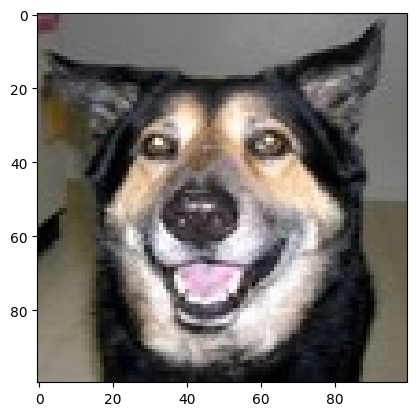

In [48]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [49]:
model = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
MaxPooling2D((2,2)),
Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(64, activation = 'relu'),
Dense(1, activation = 'sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))


In [51]:
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))


In [52]:
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

In [55]:
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
Y_train = Y_train[:349]

In [56]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 519ms/step - accuracy: 1.0000 - loss: nan
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - accuracy: 1.0000 - loss: nan
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 1.0000 - loss: nan
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 1.0000 - loss: nan
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 704ms/step - accuracy: 1.0000 - loss: nan


In [57]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (349, 100, 100, 3)
Y_train shape: (349, 1)


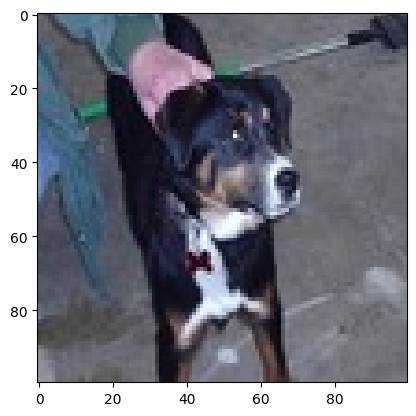

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Our model says it is a : dog


In [58]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'
print("Our model says it is a :", pred)